# [1] Выбрать один из датасетов из перечня: 
>IRIS

# [2] Вывести в табличной форме статистику по датасету:


1. - Размерность всего датасета
2. - Количество признаков
3. - Количество целевых классов и объектов в каждом из классов
4. - Процент объектов с неопределенными признаками

In [1]:
import pandas as pd

file_path = '/home/vladislave/Документы/TCP/lab1/iris/Iris.csv'
df = pd.read_csv(file_path)
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [2]:
df = df.drop('Id', axis=1)

In [3]:
dataset_shape = df.shape  # Размерность всего датасета
dataset_shape[0]

150

In [4]:
num_features = len(df.columns)  # Количество признаков
num_features

5

In [5]:
class_distribution = df['Species'].value_counts()
class_distribution

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [6]:
# Процент объектов с неопределенными признаками (NaN)
missing_percentage = df.isnull().mean() * 100
missing_percentage

SepalLengthCm    0.0
SepalWidthCm     0.0
PetalLengthCm    0.0
PetalWidthCm     0.0
Species          0.0
dtype: float64

In [7]:
# Теперь отберем три класса и четыре количественных признака для дальнейшего анализа
# Предположим, что классы уже известны (например, Iris-setosa, Iris-versicolor, Iris-virginica)
filtered_df = df[df['Species'].isin(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])]
filtered_df 

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [8]:
# Выбираем четыре количественных признака
quant_features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

In [9]:
# Фильтрация данных по количественным признакам, удалим строки с пропущенными значениями
filtered_df_cleaned = filtered_df.dropna(subset=quant_features)
filtered_df_cleaned

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# [3] Выполнить визуализацию датасета по всем парам выбранных количественных переменных, обозначая:
- в графиках с разными парами переменных объекты из разных классов
различными по форме и цвету точками,
- в графиках с одной и той же парой переменных – гистограммы с достаточным
числом разбиений (обычно – не менее 20), либо плотности распределения
переменной по оси признака.

/home/vladislave/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


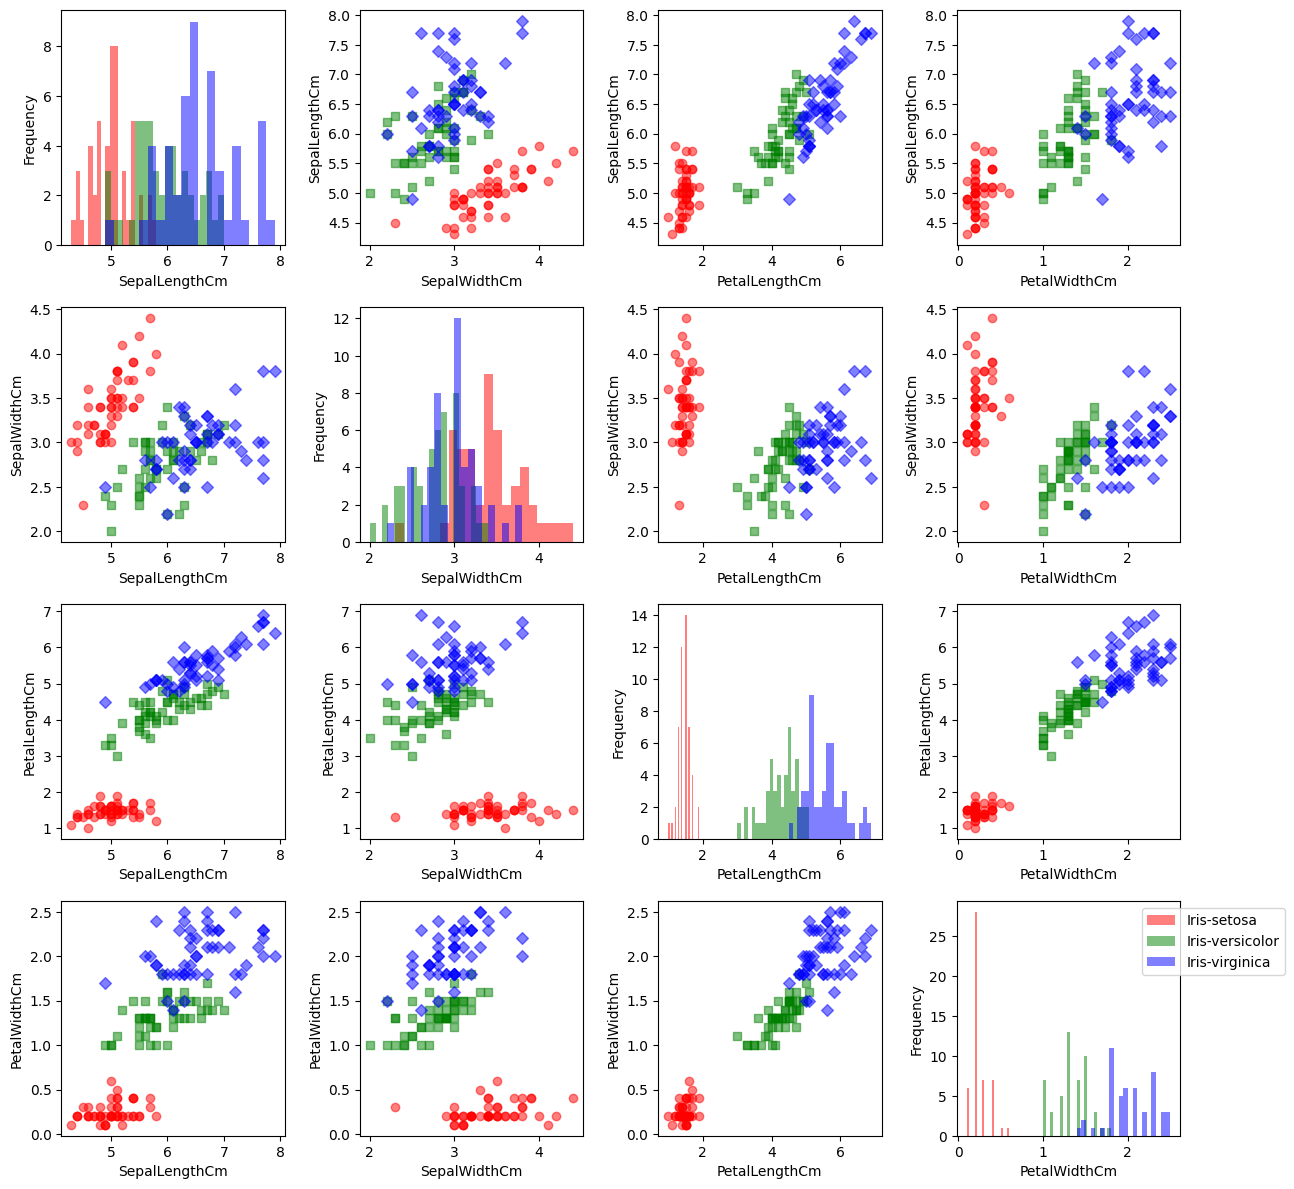

In [2]:
import matplotlib.pyplot as plt

# Оставляем нужные количественные признаки и класс
quant_features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
filtered_df_cleaned = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']]

# Список классов для цветов и маркеров
classes = filtered_df_cleaned['Species'].unique()
colors = ['r', 'g', 'b']
markers = ['o', 's', 'D']

# Построение парных графиков
plt.figure(figsize=(12, 12))

for i in range(len(quant_features)):
    for j in range(len(quant_features)):
        plt.subplot(len(quant_features), len(quant_features), i * len(quant_features) + j + 1)
        
        if i == j:  # Диагональные элементы: гистограммы
            for cls, color in zip(classes, colors):
                subset = filtered_df_cleaned[filtered_df_cleaned['Species'] == cls]
                plt.hist(subset[quant_features[i]], bins=20, alpha=0.5, label=cls, color=color)
            plt.xlabel(quant_features[i])
            plt.ylabel('Frequency')
        else:  # Парные графики
            for cls, color, marker in zip(classes, colors, markers):
                subset = filtered_df_cleaned[filtered_df_cleaned['Species'] == cls]
                plt.scatter(subset[quant_features[j]], subset[quant_features[i]], 
                            label=cls, color=color, marker=marker, alpha=0.5)
            plt.xlabel(quant_features[j])
            plt.ylabel(quant_features[i])

plt.tight_layout()
plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1))
plt.show()